stocknetdatasetから20銘柄のindexの値動きグラフを作る

In [1]:
import datetime
import pandas as pd
import sys

In [80]:
stocks = ['INTC', 'GD', 'PPL', 'CSCO', 'V', 'PEP', 'GE', 'MA', 'AMZN', 'AEP', 'XOM', 'AMGN', 'BA', 'DHR', 'UPS', 'KO', 'UNH', 'MCD', 'PFE', 'CHTR']
start_date = "2015-01-02"
end_date = "2015-09-30"
price_folder = "/home/ubuntu/stocknet-dataset/price/raw/"

In [81]:
import pandas as pd

# 日付のリストを作成する
dates = pd.date_range(start=start_date, end=end_date)

# dfを作成
index_df = pd.DataFrame({
    "Date": dates,
    "close": [0 for _ in range(len(dates))],
    "adj_close": [0 for _ in range(len(dates))]
})

# dfを表示
index_df = index_df.set_index("Date")
print(index_df.index.dtype)
print(type(index_df.iloc[0, 0]))
print(index_df.iloc[0, 0])


datetime64[ns]
<class 'numpy.int64'>
0


In [82]:
start_datetime = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_datetime = datetime.datetime.strptime(end_date, "%Y-%m-%d")

for stock in stocks:
    csv_path = price_folder + stock + ".csv"
    stock_df = pd.read_csv(csv_path)
    # print(stock_df)
    for index, row in stock_df.iterrows():
        date = datetime.datetime.strptime(row["Date"], "%Y-%m-%d")
        if date >= start_datetime and date <= end_datetime:
            index_df.loc[date, "close"] += row["Close"]
            index_df.loc[date, "adj_close"] += row["Adj Close"]
        
print(index_df)

                  close    adj_close
Date                                
2015-01-02  1869.369305  1778.553212
2015-01-03     0.000000     0.000000
2015-01-04     0.000000     0.000000
2015-01-05  1835.480043  1746.014395
2015-01-06  1814.663475  1725.821353
...                 ...          ...
2015-09-26     0.000000     0.000000
2015-09-27     0.000000     0.000000
2015-09-28  1997.501570  1935.008520
2015-09-29  1996.285686  1933.280840
2015-09-30  2044.112004  1980.112539

[272 rows x 2 columns]


In [83]:
print(index_df.iloc[0, 0])
index_df = index_df.assign(close_ratio=index_df["close"] / index_df.iloc[0, 0])
index_df = index_df.assign(adj_close_ratio=index_df["adj_close"] / index_df.iloc[0, 1])

1869.369305


In [84]:
print(index_df)

                  close    adj_close  close_ratio  adj_close_ratio
Date                                                              
2015-01-02  1869.369305  1778.553212     1.000000         1.000000
2015-01-03     0.000000     0.000000     0.000000         0.000000
2015-01-04     0.000000     0.000000     0.000000         0.000000
2015-01-05  1835.480043  1746.014395     0.981871         0.981705
2015-01-06  1814.663475  1725.821353     0.970736         0.970351
...                 ...          ...          ...              ...
2015-09-26     0.000000     0.000000     0.000000         0.000000
2015-09-27     0.000000     0.000000     0.000000         0.000000
2015-09-28  1997.501570  1935.008520     1.068543         1.087968
2015-09-29  1996.285686  1933.280840     1.067893         1.086996
2015-09-30  2044.112004  1980.112539     1.093477         1.113328

[272 rows x 4 columns]


In [85]:
# close列の値が0の行を削除
df = index_df.loc[index_df["close"] != 0]

<Axes: xlabel='Date'>

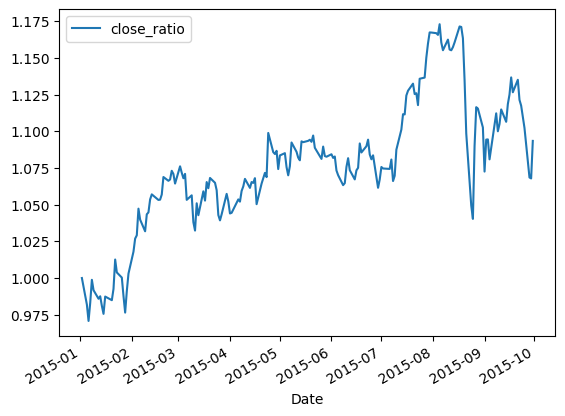

In [87]:
df.plot(y="close_ratio")